In [1]:
# execute to import notebook styling for tables and width etc.
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen('https://raw.githubusercontent.com/DataScienceUWL/DS775v2/master/ds755.css')
HTML(response.read().decode("utf-8"));

import warnings
warnings.filterwarnings('ignore')

# Genetic Algorithm via R

R has an easy-to-use genetic algorithm package called `GA`.  You can find <a href="https://cran.r-project.org/web/packages/GA/GA.pdf" target="_blank">documentation about it here.</a>. 

This notebook also serves as an example of how to integrate R into a Python Jupyter notebook using the `rpy2` package.  For integrating R and Python in a Jupyter notebook we found <a href="https://www.linkedin.com/pulse/interfacing-r-from-python-3-jupyter-notebook-jared-stufft/">this brief tutorial</a> quite helpful.

In [2]:
# load problem data into Python 
import pandas as pd
import json

with open("data/HillierTSP.json", "r") as tsp_data:
    tsp = json.load(tsp_data)

distance_matrix = tsp["DistanceMatrix"]
ind_size = tsp["TourSize"] # number fo variables or dimension of the problem

# put distance matrix into pandas dataframe for easy passing to R
dist_mat_pd = pd.DataFrame(distance_matrix)
dist_mat_pd

,0,1,2,3,4,5,6
0,0,12,10,100,100,100,12
1,12,0,8,12,100,100,100
2,10,8,0,11,3,100,9
3,100,12,11,0,11,10,100
4,100,100,3,11,0,6,7
5,100,100,100,10,6,0,9
6,12,100,9,100,7,9,0


In [3]:
# load rpy2 to interface R to Python
import rpy2.rinterface
%load_ext rpy2.ipython

In [4]:
%%R -i dist_mat_pd -o best_tour -o best_dist
# define R cell and import dist_mat_pd as R dataframe

# given a tour, calculate the total cost
tourCost <- function(tour, costMatrix) {
  tour <- c(tour, tour[1])
  route <- embed(tour, 2)[, 2:1]
  sum(costMatrix[route])
}
# inverse of the total distance is the fitness
tspFitness <- function(tour, ...) 1/tourCost(tour, ...)

require(GA)
numcities = 7
costMatrix = dist_mat_pd
result <- ga(type = "permutation", fitness = tspFitness, costMatrix=costMatrix, lower = 1, 
             upper = numcities, popSize = 10, maxiter = 500, run = 100, pmutation = 0.2            
             , monitor = NULL)

best_dist <- as.vector(1/result@fitnessValue[1])
best_tour <- c(result@solution[1,]);

In [5]:
# back in Python again!
print("The best tour found was:")
print(best_tour)
print(f"The total distance for this tour is {best_dist[0]}")

The best tour found was:
x1 x2 x3 x4 x5 x6 x7 

 7  5  3  1  2  4  6 

The total distance for this tour is 63.0


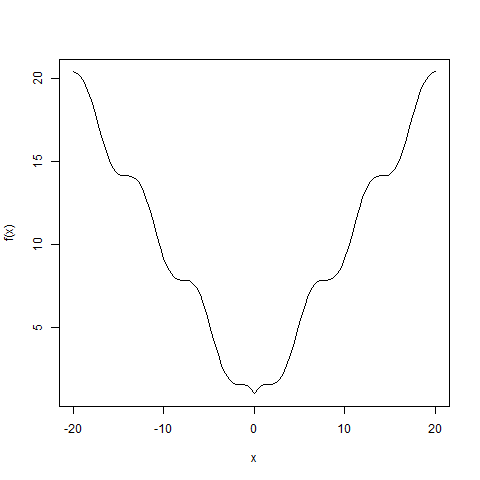

In [24]:
%%R  -o out -o GA
require(GA)
# 1) one-dimensional function
f <- function(x) abs(x)+cos(x)
curve(f, -20, 20)
fitness <- function(x) -f(x)
GA <- ga(type = "real-valued", popSize=4, fitness = fitness, lower = -20, upper = 20)

out <- ga_tourSelection(GA, k = 3)

In [23]:
out

R object with classes: ('list',) mapped to:
<ListVector - Python:0x0000011ADC71FF88 / R:0x0000011AB174CC18>
[Matrix, FloatVector]
  population: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x0000011AB100F508 / R:0x0000011AB2E2F4B0>
[0.843087, 0.843087, 0.843087, 0.843087]
  fitness: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000011AAE0EFEC8 / R:0x0000011AB3177928>
[-1.508248, -1.508248, -1.508248, -1.508248]

In [43]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
base = importr('base')
base.summary(GA)


R object with classes: ('summary.ga',) mapped to:
<ListVector - Python:0x0000011AB1F7D748 / R:0x0000011AAEE65C28>
[StrVector, FloatVector, FloatVector, FloatVector, ..., RNULLType, IntVector, FloatVector, Matrix]
  type: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x0000011AB1E9A9C8 / R:0x0000011AAE7B5670>
['real-valued']
  popSize: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000011AB1E9A3C8 / R:0x0000011AAE78B6B0>
[4.000000]
  maxiter: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000011AB1E92FC8 / R:0x0000011AB1B898A0>
[100.000000]
  elitism: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000011AB1E923C8 / R:0x0000011AAE7D5950>
[1.000000]
...
  pmutation: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL
  domain: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x0000011AB1E92588 / R:0x0000011AAF6902A0>
[100]
  suggestions: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000011AB1E92448 / R:0x0000011AAF68F650>
[-1.180917]
  iter: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x0000011AB1E9A748 / R:0x0000011AB1B06FB0>
[-0.201062]

In [44]:
GA.rx('popSize')

AttributeError: 'RS4' object has no attribute 'rx'